# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.
![title](images/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
#Import Image by this line -
#Image(url= "http://my_site.com/my_picture.jpg")

#Or, We can add image in markdown cell, by the following line.
 
#![title](images/autoencoder_1.png)


In [7]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


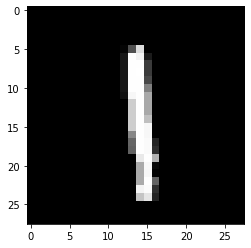

In [10]:
img = mnist.train.images[8]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')


We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a single ReLU hidden layer. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a sigmoid activation on the output layer to get values matching the input.

![title](images/simple_autoencoder.png)

In [12]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [13]:
# Create the session
sess = tf.Session()



Here we'll write a bit of code to train the network. we are not too interested in validation here, so we'll just monitor the training loss.

Calling mnist.train.next_batch(batch_size) will return a tuple of (images, labels). We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with sess.run(tf.global_variables_initializer()). Then, run the optimizer and get the loss with batch_cost, _ = sess.run([cost, opt], feed_dict=feed).


In [14]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))



Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6914
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6855
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6774
Epoch: 1/20... Training loss: 0.6728
Epoch: 1/20... Training loss: 0.6654
Epoch: 1/20... Training loss: 0.6578
Epoch: 1/20... Training loss: 0.6492
Epoch: 1/20... Training loss: 0.6386
Epoch: 1/20... Training loss: 0.6261
Epoch: 1/20... Training loss: 0.6126
Epoch: 1/20... Training loss: 0.5963
Epoch: 1/20... Training loss: 0.5824
Epoch: 1/20... Training loss: 0.5622
Epoch: 1/20... Training loss: 0.5472
Epoch: 1/20... Training loss: 0.5276
Epoch: 1/20... Training loss: 0.5081
Epoch: 1/20... Training loss: 0.4914
Epoch: 1/20... Training loss: 0.4734
Epoch: 1/20... Training loss: 0.4575
Epoch: 1/20... Training loss: 0.4379
Epoch: 1/20... Training loss: 0.4234
Epoch: 1/20... Training loss: 0.4086
Epoch: 1/20... Training loss: 0.3929
Epoch: 1/20... Training loss: 0.3835
E

Epoch: 1/20... Training loss: 0.1908
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.1984
Epoch: 1/20... Training loss: 0.1940
Epoch: 1/20... Training loss: 0.1977
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.2008
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1871
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1922
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1877
Epoch: 1/20... Training loss: 0.1834
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1828
E

Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1628
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1632
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1537
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1572
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1554
Epoch: 2/20... Training loss: 0.1492
Epoch: 2/20... Training loss: 0.1531
E

Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1314
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1289
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1290
E

Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1239
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1224
E

Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1125
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1133
Epoch: 4/20... Training loss: 0.1123
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1103
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1147
E

Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1038
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1060
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1050
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1130
Epoch: 5/20... Training loss: 0.1110
E

Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1020
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1059
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0997
E

Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.1007
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.1034
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0966
E

Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0947
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0978
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0997
E

Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.1000
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0942
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0958
E

Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0991
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0988
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0994
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0983
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0894
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0884
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0884
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0891
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0980
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0902
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0969
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0968
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0976
Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0892
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0913
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0971
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0978
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0972
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0886
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0996
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0992
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0982
Epoch: 19/20... Training loss: 0.0883
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0974
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20

## Checking out the results

Below we've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts

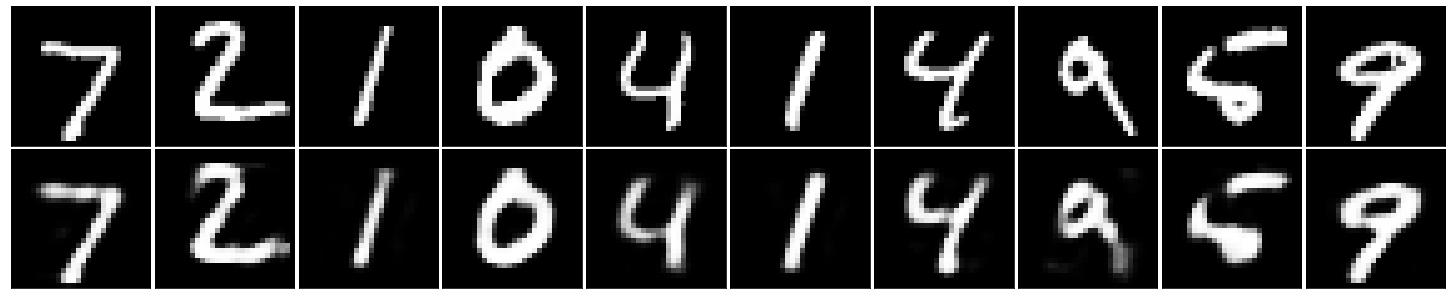

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [16]:
sess.close()


## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.
